# Анализ ситуации с развитием заболеваемости COVID-19 в России, прогноз развития заболеваемости

In [1]:
import pandas as pd

1. Сбор данных

Воспользуемся данными с сайта Data on COVID-19 (coronavirus) by Our World in Data 
(https://github.com/owid/covid-19-data/tree/master/public/data)

In [2]:
# Загружаем датафрейм с индексацией по датам
df_total = pd.read_csv('owid-covid-data.csv', index_col = 'date', parse_dates = True)
df_total

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,ZWE,Africa,Zimbabwe,133836.0,0.0,31.571,4704.0,0.0,0.714,8867.909,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2021-11-28,ZWE,Africa,Zimbabwe,133951.0,115.0,43.429,4705.0,1.0,0.857,8875.529,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2021-11-29,ZWE,Africa,Zimbabwe,134226.0,275.0,78.857,4706.0,1.0,1.000,8893.750,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
# вырезаем из датафрейма данные по России
df_rus = df_total[df_total.location == 'Russia']
df_rus

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,RUS,Europe,Russia,2.0,2.0,NaN,NaN,NaN,NaN,0.014,...,23.4,58.3,NaN,8.05,72.58,0.824,-5538.0,-3.33,-3.33,-37.954378
2020-02-01,RUS,Europe,Russia,2.0,0.0,NaN,NaN,NaN,NaN,0.014,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2020-02-02,RUS,Europe,Russia,2.0,0.0,NaN,NaN,NaN,NaN,0.014,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2020-02-03,RUS,Europe,Russia,2.0,0.0,NaN,NaN,NaN,NaN,0.014,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2020-02-04,RUS,Europe,Russia,2.0,0.0,NaN,NaN,NaN,NaN,0.014,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,RUS,Europe,Russia,9370694.0,33119.0,33649.286,266337.0,1203.0,1206.571,64221.535,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2021-11-28,RUS,Europe,Russia,9403480.0,32786.0,33226.000,267527.0,1190.0,1202.857,64446.232,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2021-11-29,RUS,Europe,Russia,9436650.0,33170.0,33031.286,268705.0,1178.0,1198.000,64673.561,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN


In [4]:
# анализируем список всех доступных показателей для выбора данных
df_rus.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [5]:
# Отбираем возможные показатели для предварительного анализа
df = df_rus[['total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case',
       'people_vaccinated', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred']]
df
# Комментарий: в рамках анализа заболеваемости данные по смертности не рассматриваем.

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,...,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,2.0,2.0,NaN,0.014,0.014,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,2.0,0.0,NaN,0.014,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,2.0,0.0,NaN,0.014,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,2.0,0.0,NaN,0.014,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,2.0,0.0,NaN,0.014,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,9370694.0,33119.0,33649.286,64221.535,226.979,230.614,NaN,NaN,NaN,NaN,...,560394.0,3.841,0.060,16.7,66011769.0,55964877.0,45.24,38.36,359318.0,0.246
2021-11-28,9403480.0,32786.0,33226.000,64446.232,224.697,227.713,NaN,NaN,NaN,NaN,...,546449.0,3.745,0.061,16.4,66201198.0,56115075.0,45.37,38.46,343573.0,0.235
2021-11-29,9436650.0,33170.0,33031.286,64673.561,227.329,226.378,NaN,NaN,NaN,NaN,...,532504.0,3.649,0.062,16.1,66258615.0,56353454.0,45.41,38.62,308970.0,0.212


Описание показателей:

total_cases	Total confirmed cases of COVID-19
new_cases	New confirmed cases of COVID-19
new_cases_smoothed	New confirmed cases of COVID-19 (7-day smoothed)
total_cases_per_million	Total confirmed cases of COVID-19 per 1,000,000 people
new_cases_per_million	New confirmed cases of COVID-19 per 1,000,000 people
new_cases_smoothed_per_million	New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people
icu_patients	Number of COVID-19 patients in intensive care units (ICUs) on a given day
icu_patients_per_million	Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people
hosp_patients	Number of COVID-19 patients in hospital on a given day
hosp_patients_per_million	Number of COVID-19 patients in hospital on a given day per 1,000,000 people
weekly_icu_admissions	Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week
weekly_icu_admissions_per_million	Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week per 1,000,000 people
weekly_hosp_admissions	Number of COVID-19 patients newly admitted to hospitals in a given week
weekly_hosp_admissions_per_million	Number of COVID-19 patients newly admitted to hospitals in a given week per 1,000,000 people
total_tests	Total tests for COVID-19
new_tests	New tests for COVID-19 (only calculated for consecutive days)
total_tests_per_thousand	Total tests for COVID-19 per 1,000 people
new_tests_per_thousand	New tests for COVID-19 per 1,000 people
new_tests_smoothed	New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we assume that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window
new_tests_smoothed_per_thousand	New tests for COVID-19 (7-day smoothed) per 1,000 people
positive_rate	The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)
tests_per_case	Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of positive_rate)
tests_units	Units used by the location to report its testing data
total_vaccinations	Total number of COVID-19 vaccination doses administered
people_vaccinated	Total number of people who received at least one vaccine dose
people_fully_vaccinated	Total number of people who received all doses prescribed by the vaccination protocol
total_boosters	Total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the vaccination protocol)
new_vaccinations	New COVID-19 vaccination doses administered (only calculated for consecutive days)
new_vaccinations_smoothed	New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report vaccination data on a daily basis, we assume that vaccination changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window
total_vaccinations_per_hundred	Total number of COVID-19 vaccination doses administered per 100 people in the total population
people_vaccinated_per_hundred	Total number of people who received at least one vaccine dose per 100 people in the total population
people_fully_vaccinated_per_hundred	Total number of people who received all doses prescribed by the vaccination protocol per 100 people in the total population
total_boosters_per_hundred	Total number of COVID-19 vaccination booster doses administered per 100 people in the total population
new_vaccinations_smoothed_per_million	New COVID-19 vaccination doses administered (7-day smoothed) per 1,000,000 people in the total population
new_people_vaccinated_smoothed	Daily number of people receiving their first vaccine dose (7-day smoothed)
new_people_vaccinated_smoothed_per_hundred	Daily number of people receiving their first vaccine dose (7-day smoothed) per 100 people in the total population

In [6]:
# Для проверки корректности данных по России и сравнения некоторых тенденций выберем также данные о заболеваемости в США:
df_usa = df_total[df_total.location == 'United States']
df_usa

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,USA,North America,United States,1.0,NaN,NaN,NaN,NaN,NaN,0.003,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2020-01-23,USA,North America,United States,1.0,0.0,NaN,NaN,NaN,NaN,0.003,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2020-01-24,USA,North America,United States,2.0,1.0,NaN,NaN,NaN,NaN,0.006,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2020-01-25,USA,North America,United States,2.0,0.0,NaN,NaN,NaN,NaN,0.006,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2020-01-26,USA,North America,United States,5.0,3.0,NaN,NaN,NaN,NaN,0.015,...,19.1,24.6,NaN,2.77,78.86,0.926,-9247.3,-3.72,-3.1,-27.776754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,USA,North America,United States,48201079.0,24556.0,71470.857,776640.0,187.0,733.143,144784.910,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2021-11-28,USA,North America,United States,48241903.0,40824.0,71907.000,776743.0,103.0,731.143,144907.536,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2021-11-29,USA,North America,United States,48438876.0,196973.0,78547.714,778705.0,1962.0,835.286,145499.197,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


2. Предварительный (разведочный) анализ

In [7]:
# Общие статистические свойства отобранных показателей по России:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,...,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
count,6.710000e+02,671.000000,666.000000,671.000000,671.000000,666.000000,0.0,0.0,0.0,0.0,...,629.000000,629.000000,629.000000,629.000000,2.530000e+02,2.450000e+02,253.000000,245.000000,351.000000,351.000000
mean,3.301101e+06,14159.219076,14118.750766,22623.913776,97.039440,96.762087,NaN,NaN,NaN,NaN,...,355133.583466,2.433884,0.037855,46.361367,3.082262e+07,2.451152e+07,21.123874,16.798653,188520.019943,0.129162
std,2.762386e+06,10072.427849,9978.382607,18931.860915,69.030836,68.386298,NaN,NaN,NaN,NaN,...,134424.357996,0.921280,0.016459,123.601020,1.869908e+07,1.670506e+07,12.815388,11.448888,133491.671933,0.091521
min,2.000000e+00,0.000000,0.000000,0.014000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,4364.000000,0.030000,0.001000,10.300000,2.850000e+04,1.091497e+06,0.020000,0.750000,3357.000000,0.002000
25%,7.548065e+05,6559.500000,6582.035500,5173.024500,44.955000,45.109750,NaN,NaN,NaN,NaN,...,282339.000000,1.935000,0.027000,20.800000,1.365350e+07,9.592559e+06,9.360000,6.570000,71420.000000,0.049000
50%,3.127347e+06,10559.000000,10491.928500,21433.100000,72.366000,71.906000,NaN,NaN,NaN,NaN,...,330897.000000,2.268000,0.037000,27.000000,3.053884e+07,1.984479e+07,20.930000,13.600000,155122.000000,0.106000
75%,5.196188e+06,21729.000000,21778.393000,35611.791500,148.918500,149.257250,NaN,NaN,NaN,NaN,...,463705.000000,3.178000,0.048000,37.500000,4.660078e+07,3.990366e+07,31.940000,27.350000,266552.000000,0.182500
max,9.500836e+06,40210.000000,39354.286000,65113.456000,275.577000,269.712000,NaN,NaN,NaN,NaN,...,617847.000000,4.234000,0.097000,1796.600000,6.701295e+07,5.703759e+07,45.930000,39.090000,569281.000000,0.390000


In [8]:
# Из приведенных выше свойств, в частности, видно, что отсутствуют данные по госпитализации в России. 
# Убедимся в этом точнее с помощью боксплотов: 

<AxesSubplot:>

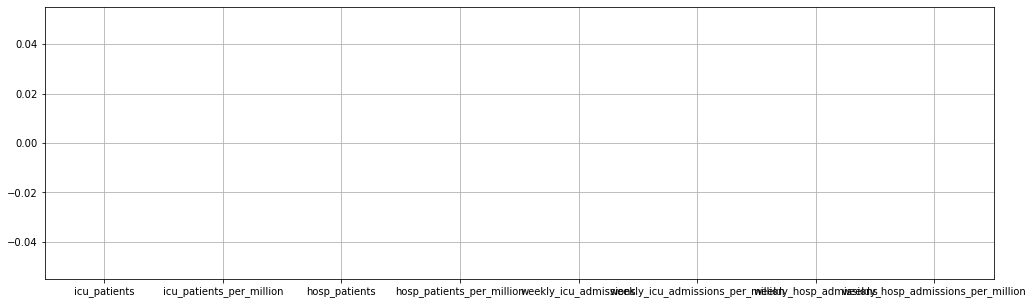

In [9]:
df_rus[['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million']].boxplot(figsize=(17, 5))

In [10]:
# Действительно, данные по госпитализации в России отсутствуют. Ниже рассмотрим эти показатели на примере США.

In [11]:
# Рассмотрим данные по тестированию на COVID-19:

# Среднее значение соотношения положительных тестов к их общему количеству:
print(df['positive_rate'].mean())

0.03785532591414939


In [12]:
# Учитывая, что менее 4% тестов дают положительный результат, в дальнейшем показатели тестирования не анализируем

In [13]:
# Боксплоты для общего числа заболеваемости в России, числа вновь заболевшших:

In [14]:
df['total_cases']

date
2020-01-31          2.0
2020-02-01          2.0
2020-02-02          2.0
2020-02-03          2.0
2020-02-04          2.0
                ...    
2021-11-27    9370694.0
2021-11-28    9403480.0
2021-11-29    9436650.0
2021-11-30    9468640.0
2021-12-01    9500836.0
Name: total_cases, Length: 671, dtype: float64

<AxesSubplot:ylabel='количество заболеваний, млн'>

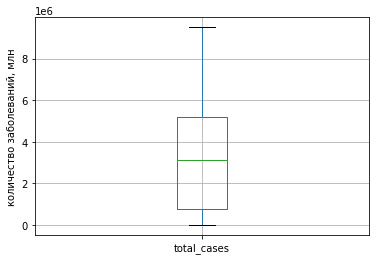

In [15]:
import matplotlib
import matplotlib.pyplot as plt
plt.ylabel('количество заболеваний, млн')
df[['total_cases']].boxplot()

<AxesSubplot:>

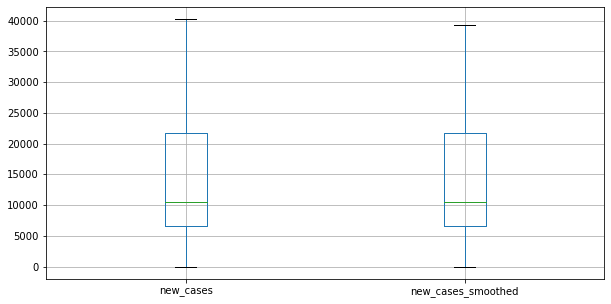

In [16]:
#plt.ylabel('количество новых заболеваний, ед.')
df[['new_cases', 'new_cases_smoothed']].boxplot(figsize=(10, 5))

In [17]:
# График для общего числа заболеваемости в России:

<AxesSubplot:xlabel='date'>

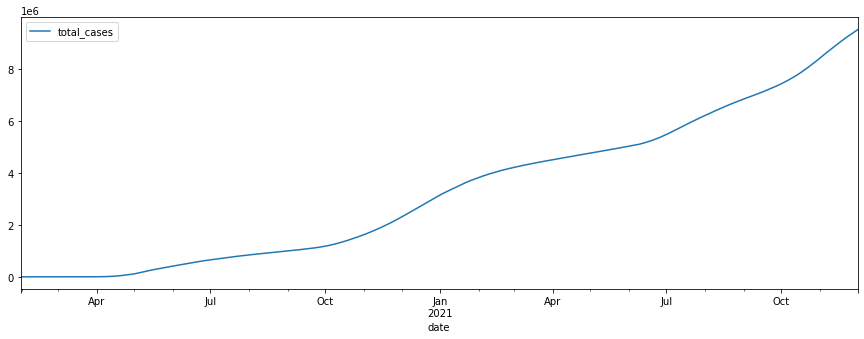

In [18]:
df[['total_cases']].plot(figsize=(15, 5))

In [19]:
# Вывод: на графике видно, что скорость прироста новых заболевших периодически увеличивается и уменьшается.

<AxesSubplot:xlabel='date'>

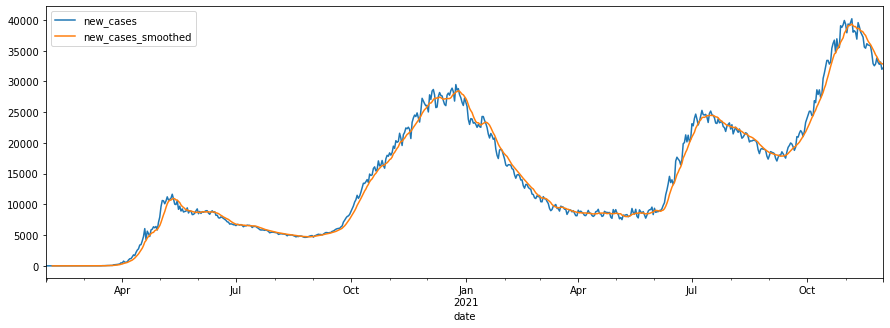

In [20]:
# Графики для количества вновь заболевших (точный и сглаженный):
df[['new_cases', 'new_cases_smoothed']].plot(figsize=(15, 5))

In [21]:
# Вывод: из графика четко видно наличие общего тренда на увеличение количества вновь заболевших, 
# а также волны (сезонность?) и влияние случайных факторов. 
# Ниже разложим временной ряд 'new_cases' на составляющие его компоненты.

<AxesSubplot:>

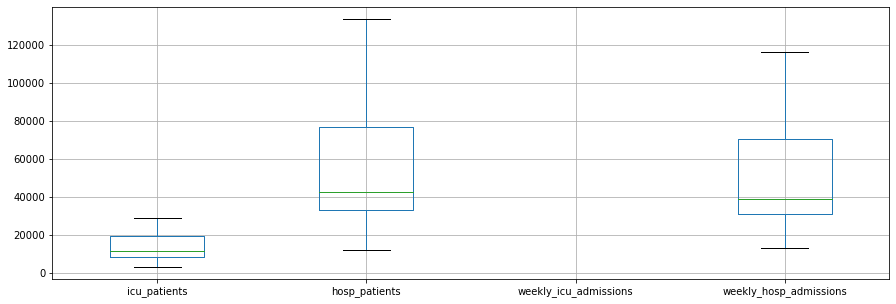

In [22]:
# Ввиду отсутствия данных по госпитализации в России расмотрим аналогичные данные по США:
    
df_usa[['icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions']].boxplot(figsize=(15, 5))

In [23]:
# Проверим наличие корреляции между общим количеством госпитализированных пациентов 
# и количеством пациентов на интенсивной терапии в США:

df_usa[['icu_patients', 'hosp_patients']].corr()

,icu_patients,hosp_patients
icu_patients,1.000000,0.983716
hosp_patients,0.983716,1.000000


In [24]:
# Вывод:высокая степень корреляции.

<AxesSubplot:xlabel='date'>

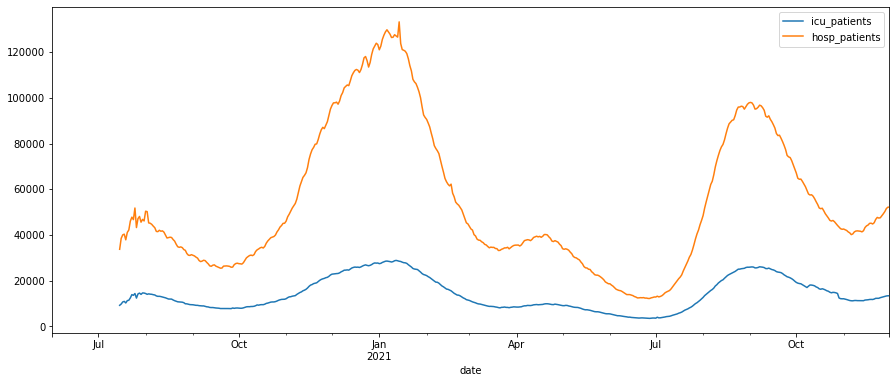

In [25]:
# Графики для общего количества госпитализированных пациентов и количества пациентов на интенсивной терапии в США:
df_usa[['icu_patients', 'hosp_patients']].plot(figsize=(15, 6), xlim=['2020-06-01','2021-12-01'])

In [26]:
# Вывод: на графике видны большие колебания количества госпитализированных пациентов, однако общий тренд на увеличение не виден.

In [27]:
# Проверим наличие взаимосвязи между общим количеством заболевших в России и общим количеством вакцинированных:

In [28]:
#df.columns

<AxesSubplot:xlabel='date'>

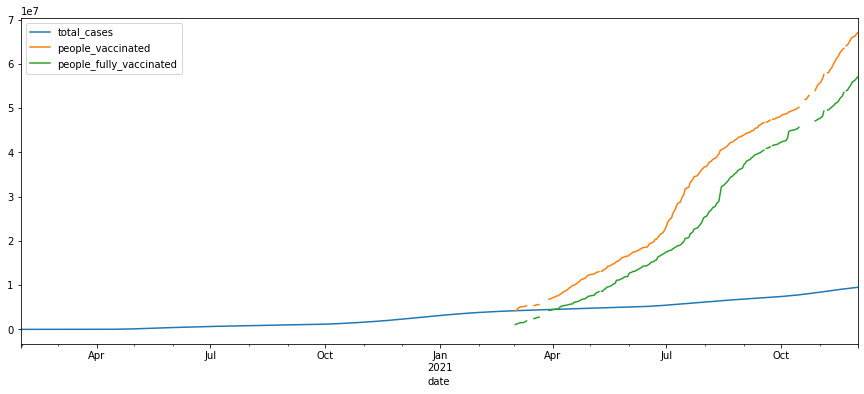

In [29]:
df[['total_cases', 'people_vaccinated', 'people_fully_vaccinated']].plot(figsize=(15,6))

<ipython-input-30-06f3928c37ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['people_vaccinated'].interpolate(method='linear', inplace=True)
<ipython-input-30-06f3928c37ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['people_fully_vaccinated'].interpolate(method='linear', inplace=True)


<AxesSubplot:xlabel='date'>

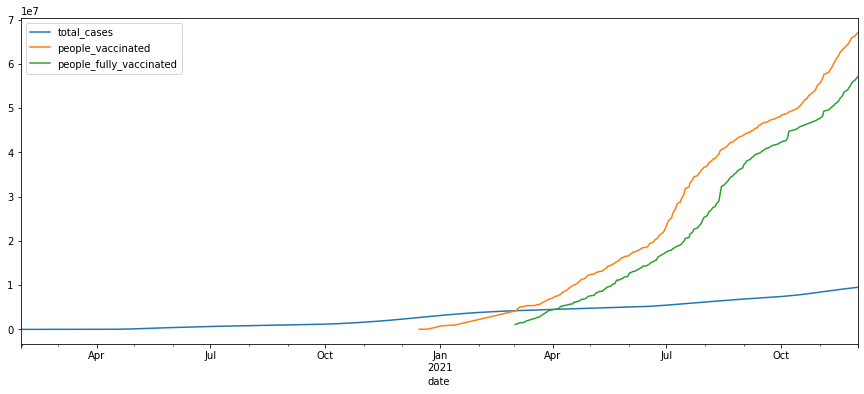

In [30]:
# Учитывая, что в данных по количеству вакцинированных видны пропуски, 
# используем для заполнения пропусков метод линейной интерполяции:
df['people_vaccinated'].interpolate(method='linear', inplace=True)
df['people_fully_vaccinated'].interpolate(method='linear', inplace=True)
df[['total_cases', 'people_vaccinated', 'people_fully_vaccinated']].plot(figsize=(15,6))

In [31]:
# Вывод: исходя из общей логики, с увеличением количества вацинированных общее число заболевших должно перестать расти, 
# однако из графика это не видно.
# Проверим это, рассчитав корреляцию между показателями:

In [32]:
df[['total_cases', 'people_vaccinated', 'people_fully_vaccinated']].corr()

,total_cases,people_vaccinated,people_fully_vaccinated
total_cases,1.000000,0.985027,0.987704
people_vaccinated,0.985027,1.000000,0.993173
people_fully_vaccinated,0.987704,0.993173,1.000000


In [33]:
# Вывод: действительно между общим количеством заболеваний и количеством вакцинированных имеется положительная корреляция.
# Следовательно, до настоящего времени рост количества вакцинированных не привел к уменьшению прироста заболевших. 

In [34]:
# Для сравнения рассмотрим графики и коэффициенты корреляции этих показателей для США:

<AxesSubplot:xlabel='date'>

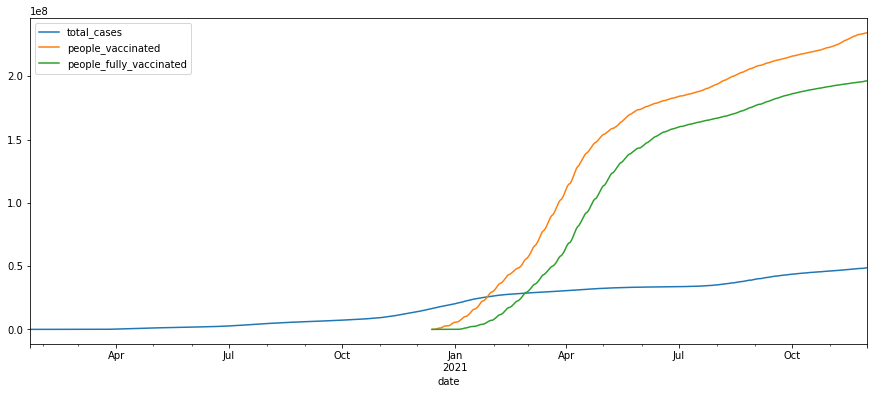

In [35]:
df_usa[['total_cases', 'people_vaccinated', 'people_fully_vaccinated']].plot(figsize =(15, 6))

In [36]:
df_usa[['total_cases', 'people_vaccinated', 'people_fully_vaccinated']].corr()

,total_cases,people_vaccinated,people_fully_vaccinated
total_cases,1.000000,0.915282,0.901097
people_vaccinated,0.915282,1.000000,0.992382
people_fully_vaccinated,0.901097,0.992382,1.000000


In [37]:
# Как видно из графика и таблицы, тенденции полностью аналогичны российским.

In [38]:
# Также сравним уровень вакцинации в России и в США (количество вацинированных на 100 жителей):

<AxesSubplot:xlabel='date'>

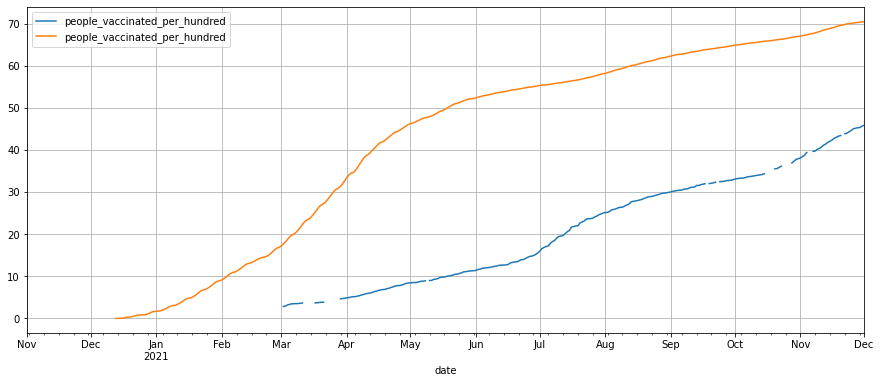

In [39]:
df['people_vaccinated_per_hundred'].plot(figsize=(15, 6), xlim=['2020-11-01','2021-12-01'], legend=True)
df_usa['people_vaccinated_per_hundred'].plot(figsize=(15, 6), xlim=['2020-11-01','2021-12-01'], legend=True, grid=True)

In [40]:
# Вывод: как видно из графика, вакцинация в США началась на 2,5 месяца раньше, 
# уровень вакцинации значительно превышает российский.

3. Выбор и настройка модели

In [41]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              


import warnings
warnings.filterwarnings("ignore")

In [42]:
# Рассмотрим признак 'new_cases'

<AxesSubplot:xlabel='date'>

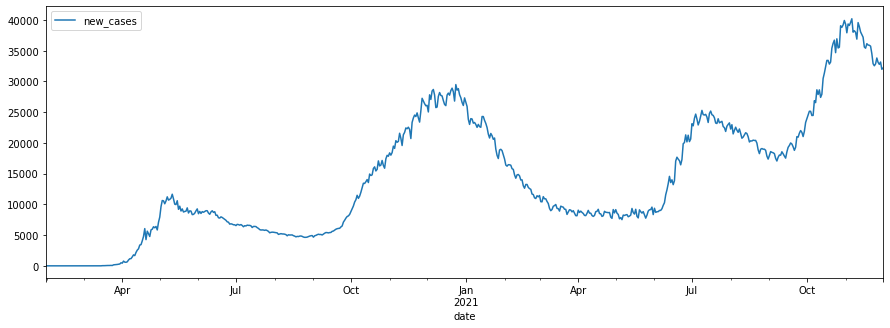

In [48]:
df[['new_cases']].plot(figsize=(15, 5))

In [44]:
# Проведем ETS декомпозицию

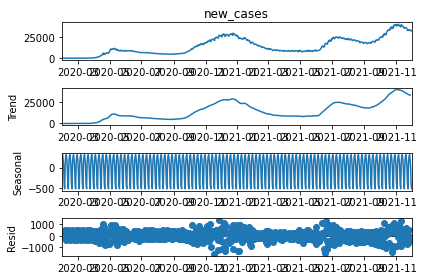

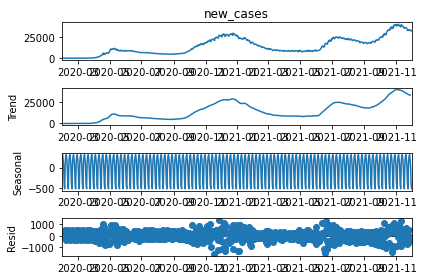

In [45]:
result = seasonal_decompose(df['new_cases'], model='add') # аддитивная модель
result.plot()

In [46]:
# Протестируем с моделью "multiplicative"

In [47]:
result = seasonal_decompose(df['new_cases'], model='multiplicative')
result.plot()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [ ]:
# для исключения нулевых значений атрибута отсечем часть датафрейма:

In [51]:
df1 = df['2020-04-01':]

In [52]:
df1

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,...,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,2777.0,440.0,302.714,19.032,3.016,2.075,NaN,NaN,NaN,NaN,...,48393.0,0.332,0.006,159.9,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,3548.0,771.0,386.857,24.316,5.284,2.651,NaN,NaN,NaN,NaN,...,50228.0,0.344,0.008,129.8,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,4149.0,601.0,444.714,28.435,4.119,3.048,NaN,NaN,NaN,NaN,...,56604.0,0.388,0.008,127.3,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,4731.0,582.0,495.286,32.424,3.989,3.394,NaN,NaN,NaN,NaN,...,61874.0,0.424,0.008,124.9,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,5389.0,658.0,550.714,36.933,4.510,3.774,NaN,NaN,NaN,NaN,...,59268.0,0.406,0.009,107.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,9370694.0,33119.0,33649.286,64221.535,226.979,230.614,NaN,NaN,NaN,NaN,...,560394.0,3.841,0.060,16.7,66011769.0,55964877.0,45.24,38.36,359318.0,0.246
2021-11-28,9403480.0,32786.0,33226.000,64446.232,224.697,227.713,NaN,NaN,NaN,NaN,...,546449.0,3.745,0.061,16.4,66201198.0,56115075.0,45.37,38.46,343573.0,0.235
2021-11-29,9436650.0,33170.0,33031.286,64673.561,227.329,226.378,NaN,NaN,NaN,NaN,...,532504.0,3.649,0.062,16.1,66258615.0,56353454.0,45.41,38.62,308970.0,0.212


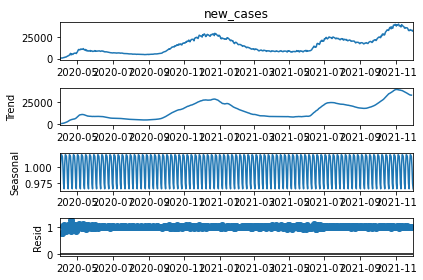

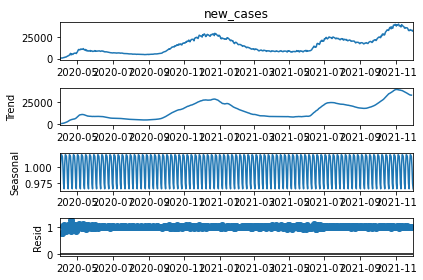

In [53]:
result = seasonal_decompose(df1['new_cases'], model='multiplicative')
result.plot()

In [ ]:
# Остаточный компонент при мультипликативной модели ETS меньше, следовательно она в большей степени подходит для разделения на компоненты 

5. Использование и оценка модели прогнозирования

In [ ]:
# Запускаем pmdarima.auto_arima

In [54]:
auto_arima(df1['new_cases'], seasonal=True, m=6).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  610
Model:             SARIMAX(5, 1, 4)x(2, 0, [1, 2], 6)   Log Likelihood               -4751.253
Date:                                Mon, 27 Dec 2021   AIC                           9530.506
Time:                                        20:40:18   BIC                           9592.272
Sample:                                             0   HQIC                          9554.534
                                                - 610                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9186      0.191     10.067      0.000       1.545       2.292
ar.L2         -1.6906      0.353     -4.795      0.000      -2.382      -1.000
ar.L3          0.6434      0.272      2.365      0.018       0.110       1.177
ar.L4         -0.0420      0.094     -0.449      0.653      -0.225       0.141
ar.L5          0.1476      0.083      1.771      0.077      -0.016       0.311
ma.L1         -2.2577      0.192    -11.782      0.000      -2.633      -1.882
ma.L2          2.3723      0.410      5.781      0.000       1.568       3.177
ma.L3         -1.2009      0.389     -3.088      0.002      -1.963      -0.439
ma.L4          0.1939      0.156      1.245      0.213      -0.111       0.499
ar.S.L6       -0.3892      0.094     -4.140      0.000      -0.574      -0.205
ar.S.L12      -0.8789      0.083    -10.648      0.000      -1.041      -0.717
ma.S.L6        0.4277      0.115      3.713      0.000       0.202       0.654
ma.S.L12       0.7894      0.110      7.194      0.000       0.574       1.004
sigma2      4.047e+05   2.16e+04     18.706      0.000    3.62e+05    4.47e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                99.44
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               3.21   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# делим на train/test

In [55]:
len(df1)

610

In [56]:
train = df.iloc[:595]
test = df.iloc[595:]

In [ ]:
# Обучаем SARIMA(5, 1, 4)x(2, 0, [1, 2], 6)

In [58]:
# (5, 1, 4)x(2, 0, [1, 2], 6)
model = SARIMAX(train['new_cases'], order=(5, 1, 4), seasonal_order=(2, 0, [1, 2], 6))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                              new_cases   No. Observations:                  595
Model:             SARIMAX(5, 1, 4)x(2, 0, [1, 2], 6)   Log Likelihood               -4570.686
Date:                                Mon, 27 Dec 2021   AIC                           9169.372
Time:                                        21:08:32   BIC                           9230.788
Sample:                                    01-31-2020   HQIC                          9193.291
                                         - 09-16-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4095      0.048      8.547      0.000       0.316       0.503
ar.L2         -1.0988      0.044    -25.206      0.000      -1.184      -1.013
ar.L3          0.2290      0.068      3.354      0.001       0.095       0.363
ar.L4         -0.6970      0.037    -18.973      0.000      -0.769      -0.625
ar.L5         -0.3429      0.039     -8.692      0.000      -0.420      -0.266
ma.L1         -0.6829      0.041    -16.777      0.000      -0.763      -0.603
ma.L2          1.2109      0.049     24.722      0.000       1.115       1.307
ma.L3         -0.5863      0.057    -10.366      0.000      -0.697      -0.475
ma.L4          0.8128      0.039     20.760      0.000       0.736       0.890
ar.S.L6        0.2096      0.873      0.240      0.810      -1.502       1.921
ar.S.L12       0.3959      0.589      0.672      0.501      -0.758       1.550
ma.S.L6        0.0663      0.866      0.077      0.939      -1.632       1.764
ma.S.L12      -0.2903      0.348     -0.835      0.404      -0.972       0.391
sigma2      3.147e+05   1.46e+04     21.522      0.000    2.86e+05    3.43e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               213.57
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
# предсказанные значения
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(5, 1, 4)x(2, 0, [1, 2], 6) ')

In [61]:
# Сравниваем результаты
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['new_cases'][i]}")

predicted=19340.10426, expected=19589.0
predicted=19347.20127, expected=19999.0
predicted=19196.64725, expected=19825.0
predicted=18547.6158 , expected=19376.0
predicted=18410.08461, expected=18796.0
predicted=18981.19283, expected=19308.0
predicted=19460.17258, expected=21023.0
predicted=19506.53635, expected=20942.0
predicted=19574.23859, expected=21583.0
predicted=19317.21787, expected=22015.0
predicted=18745.14251, expected=21731.0
predicted=18597.20817, expected=21040.0
predicted=19129.32026, expected=21891.0
predicted=19515.7791 , expected=23330.0
predicted=19650.81611, expected=23953.0
predicted=19680.44235, expected=24632.0
predicted=19439.21901, expected=25161.0
predicted=18872.56248, expected=25150.0
predicted=18759.24302, expected=24465.0
predicted=19211.3916 , expected=24479.0
predicted=19621.78972, expected=26881.0
predicted=19743.05634, expected=26561.0
predicted=19795.31965, expected=28648.0
predicted=19492.18144, expected=27889.0
predicted=18946.76406, expected=28636.0


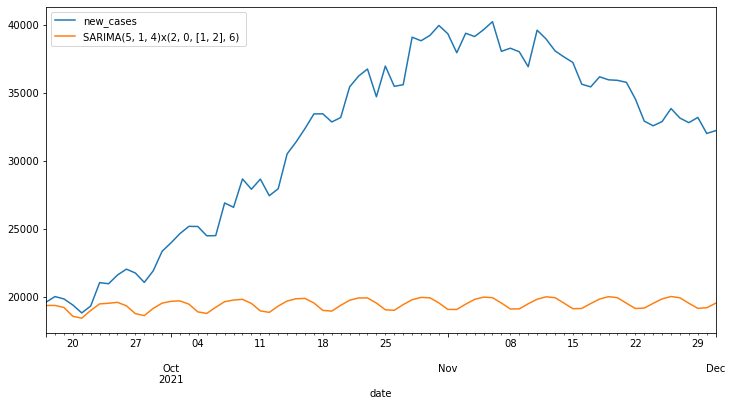

In [62]:
# графики

ax = test['new_cases'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
# ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
# Оценка модели

In [64]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['new_cases'], predictions)
print(f'SARIMA(5, 1, 4)x(2, 0, [1, 2], 6) MSE Error: {error:11.10}')

SARIMA(5, 1, 4)x(2, 0, [1, 2], 6) MSE Error: 186145266.9


In [65]:
from statsmodels.tools.eval_measures import rmse
# rmse = root mse
error = rmse(test['new_cases'], predictions)
print(f'SARIMA(5, 1, 4)x(2, 0, [1, 2], 6) RMSE Error: {error:11.10}')

SARIMA(5, 1, 4)x(2, 0, [1, 2], 6) RMSE Error:  13643.5064


In [ ]:
# Обучаем модель на полных данных и прогнозируем будущее 

In [66]:
model = SARIMAX(df['new_cases'],order=(5, 1, 4),seasonal_order=(2, 0, [1, 2], 6))
results = model.fit()

fcast = results.predict(len(df),len(df)+123,typ='levels').rename('SARIMA(5, 1, 4)x(2, 0, [1, 2], 6) Forecast')

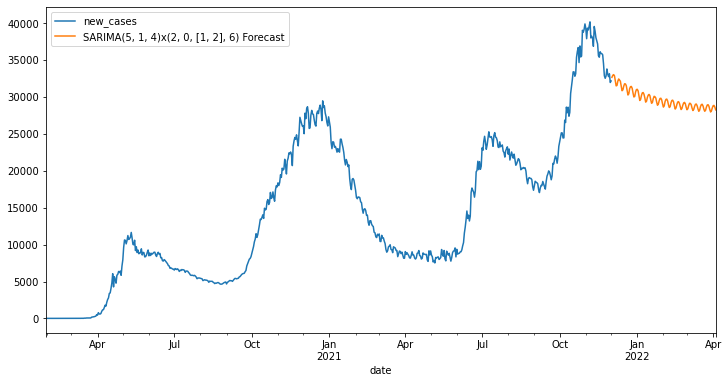

In [68]:
# график

ax = df['new_cases'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
# ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
# df[['new_cases', 'new_cases_smoothed']].plot(figsize =(15, 6))

In [ ]:
# df['2020-11-01':'2021-12-01'][['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].plot(figsize =(15, 6))